선형회귀(Linear Regression) : 보험료 예측

목표: 보험 데이터셋을 이용하여 보험사에서 청구할 보험료를 예측

via 최효원's Jupyter Notebook

간단하게 아플 가능성이 더 높아보이는 사람에게 더 높은 보험료가 책정된다고 생각할 수 있지만,
실제로 보험료 계산은 상당이 복잡하고, 사람마다 각각 다르게 책정됩니다.

독립, 종속변수가 선형 관계에 놓여있을 때 적합하고, 다른 회귀 모델과 성능을 비교하는 baseline 으로 사용되는
선형 회귀 알고리즘을 데이터셋에 적용 후, 보험료 예측을 위한 작업을 진행했습니다.

In [4]:
import pandas as pd

df = pd.read_csv('https://media.githubusercontent.com/media/musthave-ML10/data_source/main/insurance.csv')
#데이터 출처: https://media.githubusercontent.com/media/musthave-ML10

In [5]:
df.head()
#연령(연속형) #성별(범주형) #체질량지수(연속형) #흡연여부(범주형) #청구비용(target, 연속형)
#sex 1 - 남자, 2 - 여자
#smoker 1 - 흡연자, 0 - 비흡연자

,age,sex,bmi,children,smoker,charges
0,19,0,27.900,0,1,16884.92400
1,18,1,33.770,1,0,1725.55230
2,28,1,33.000,3,0,4449.46200
3,33,1,22.705,0,0,21984.47061
4,32,1,28.880,0,0,3866.85520


In [4]:
df.info()
#total = 1338 rows / 6 cols

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   int64  
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   int64  
 5   charges   1338 non-null   float64
dtypes: float64(2), int64(4)
memory usage: 62.8 KB


In [6]:
round(df.describe().T,2)
#데이터 통계 정보

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.21,14.05,18.00,27.00,39.00,51.00,64.00
sex,1338.0,0.51,0.50,0.00,0.00,1.00,1.00,1.00
bmi,1338.0,30.66,6.10,15.96,26.30,30.40,34.69,53.13
children,1338.0,1.09,1.21,0.00,0.00,1.00,2.00,5.00
smoker,1338.0,0.20,0.40,0.00,0.00,0.00,0.00,1.00
charges,1338.0,13270.42,12110.01,1121.87,4740.29,9382.03,16639.91,63770.43


In [8]:
X = df[['age', 'sex', 'bmi', 'children', 'smoker']]
#독립 변수
y = df['charges']
#종속 변수(보험료)
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

In [9]:
from sklearn.model_selection import train_test_split
#학습 데이터, 테스트 데이터 분할(8:2)

xtr,xt,ytr,yt = train_test_split(X,y,test_size = 0.2, random_state = 100)

In [10]:
from sklearn.linear_model import LinearRegression
#선형 회귀 알고리즘 import

lr = LinearRegression()
lr.fit(xtr, ytr)
#학습 데이터를 활용해 학습

LinearRegression()

In [11]:
pred = lr.predict(xt)
#분할한 테스트 독립 변수를 활용해 예측 진행

In [12]:
comparison = pd.DataFrame({'actual': yt, 'pred': pred})
#테이블을 활용한 예측 데이터, 실제 데이터 간 비교
comparison

,actual,pred
12,1826.84300,4765.249466
306,20177.67113,4957.730865
318,7421.19455,8298.988153
815,1877.92940,3078.811868
157,15518.18025,24165.956542
...,...,...
713,1984.45330,5776.764928
1282,14283.45940,23102.847340
531,14043.47670,14280.732585
537,8825.08600,10527.417291


<AxesSubplot:xlabel='actual', ylabel='pred'>

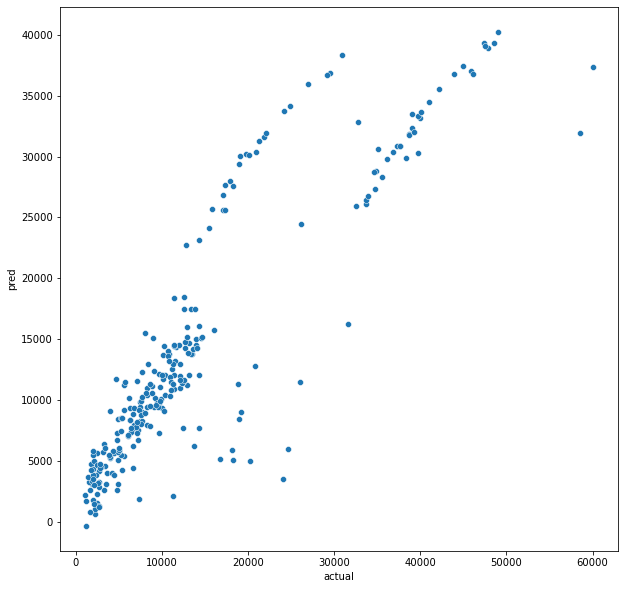

In [13]:
import matplotlib.pyplot as plt
#그래프를 활용한 예측 평가를 위해 시각화 패키지 import
import seaborn as sns

plt.figure(figsize = (10,10))
sns.scatterplot(x = 'actual', y = 'pred', data = comparison)
#산점도를 활용한 시각화 진행

*시계 기준 7시 방향 군집 - 실젯값과 예측값이 비교적 비슷합니다.
*11시 방향 군집 - 전반적으로 실젯값보다 예측값이 더 높게 나타난 case.
*1시 방향 군집 - 전반적으로 실젯값보다 예측값이 더 낮은 case.

*테이블, 그래프를 활용한 예측 확인은 직관적으로 예측력을 확인할 수 있을 뿐, 객관적 기준이 될 수 없습니다.
 따라서, 회귀 예측 평가에 가장 흔히 쓰이는 RMSE(평균 제곱근 편차), R^2(결정 계수) 를 활용해 모델 평가를 진행했습니다.

In [14]:
from sklearn.metrics import mean_squared_error
#MSE 라이브러리 import
mean_squared_error(yt, pred)**0.5
#RMSE 계산 실행

5684.927776334484

In [16]:
lr.score(xtr, ytr)
#R^2 결정계수 확인

0.7368220127747351

In [17]:
lr.score(xt, yt) 

0.7938983522335603

*결정계수가 약 0.79로 확인됐고, 이는 일반적으로 예측력이 괜찮은 모델이라 할 수 있습니다.

In [18]:
lr.coef_
#예측 선형 모델(함수) 에 대한 각 독립변수의 계수 확인

array([2.64799803e+02, 1.73446608e+01, 2.97514806e+02, 4.69339602e+02,
       2.34692802e+04])

In [20]:
pd.Series(lr.coef_, index = X.columns)
#smoker 변수가 예측 모델에 가장 큰 영향을 끼치는 것으로 확인됐습니다.
#(smoker 변수가 1 일때, 보험료 약 23469 증가)

age           264.799803
sex            17.344661
bmi           297.514806
children      469.339602
smoker      23469.280173
dtype: float64

In [21]:
lr.intercept_
#예측 선형 모델(함수) 에 대한 y절편 확인

-11576.99997611236